In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
X_train = np.linspace(-1,1,20)

In [7]:
y_train = np.array([-0.6561, -0.3099, -0.59035, -0.50855, -0.285,
                    -0.2443, -0.02445, 0.00135, -0.2006, 0.07475,
                    -0.1422, 0.06515, 0.15265, 0.3521, 0.28415,
                    0.5524, 0.23115, 0.20853, 0.4211, 0.60485])

In [6]:
X_test = np.linspace(-1 , 1, 20)

In [8]:
y_test = np.array([-0.69415, -0.451, -0.43005, -0.4484, -0.1475,
                    -0.5019, -0.28055, 0.24595, -0.1425, -0.0286,
                    0.23415, 0.46575, 0.07955, 0.1973, 0.0719,
                    0.3639, 0.5536, 0.3365, 0.50705, 0.33435])

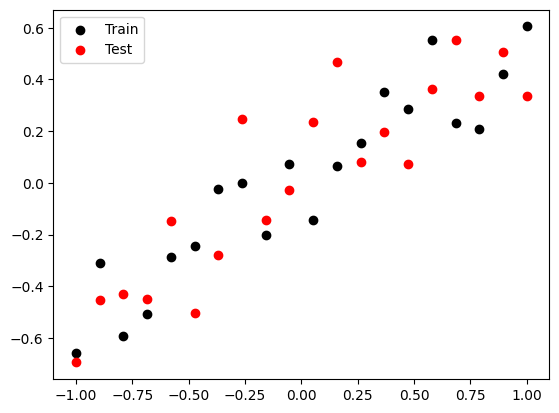

In [9]:
plt.scatter(X_train, y_train, c='black', label='Train')
plt.scatter(X_test, y_test, c='red', label='Test')
plt.legend()
plt.show()

In [10]:
model = Sequential()

model.add(Dense(128, input_dim=1, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='linear'))

adam = Adam(learning_rate=0.01)
model.compile(loss='mse', optimizer=adam, metrics=['mse'])

history = model.fit(X_train, y_train, epochs=500, validation_data= (X_test, y_test), verbose=False)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
_, train_mse = model.evaluate(X_train, y_train, verbose=0)
_, test_mse = model.evaluate(X_test, y_test, verbose=0)
print("Train: {}, Test: {}".format(train_mse, test_mse))


Train: 0.003973980434238911, Test: 0.04578663408756256


In [12]:
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


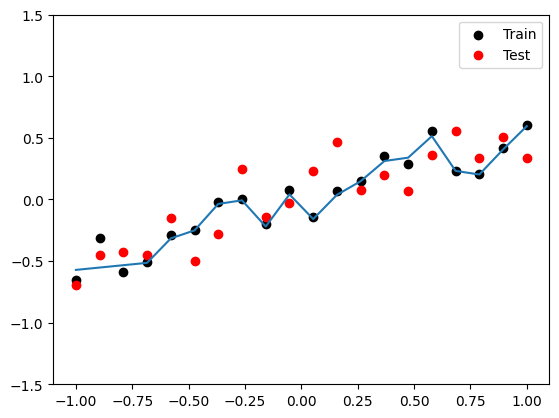

In [13]:
plt.figure()
plt.scatter(X_train, y_train, c='black', label='Train')
plt.scatter(X_test, y_test, c='red', label='Test')
plt.plot(X_test, y_pred)
plt.legend()
plt.ylim(-1.5, 1.5)
plt.show()

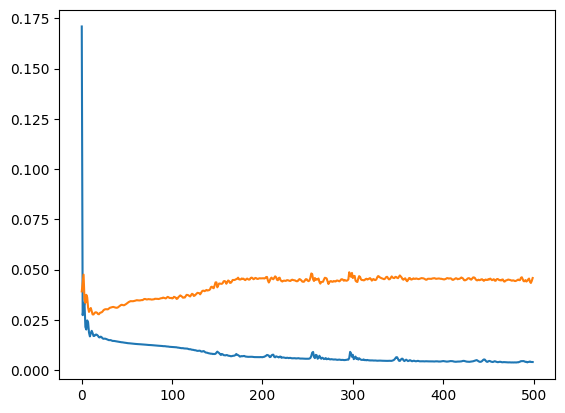

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# Dropout Model

In [15]:
model = Sequential()

model.add(Dense(128, input_dim=1, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))
adam = Adam(learning_rate=0.01)

model.compile(loss='mse', optimizer=adam, metrics=['mse'])
history = model.fit(X_train, y_train, epochs=500, validation_data = (X_test, y_test), verbose=False)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
_, train_mse = model.evaluate(X_train, y_train, verbose=0)
_, test_mse = model.evaluate(X_test, y_test, verbose=0)

print("Train: {}, Test: {}".format(train_mse, test_mse))

Train: 0.011509771458804607, Test: 0.03814995661377907


In [17]:
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


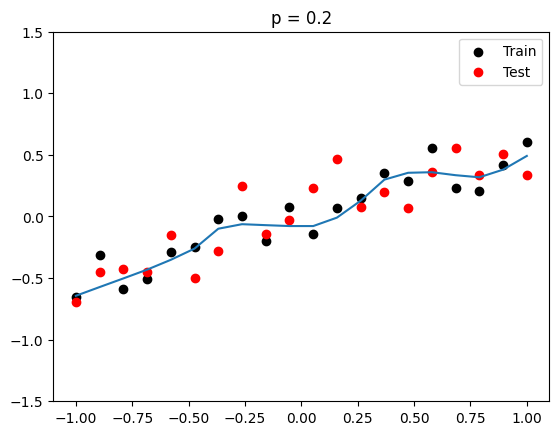

In [18]:
plt.figure()
plt.title('p = 0.2')
plt.scatter(X_train, y_train, c='black', label='Train')
plt.scatter(X_test, y_test, c='red', label='Test')
plt.plot(X_test, y_pred)
plt.legend()
plt.ylim(-1.5, 1.5)
plt.show()

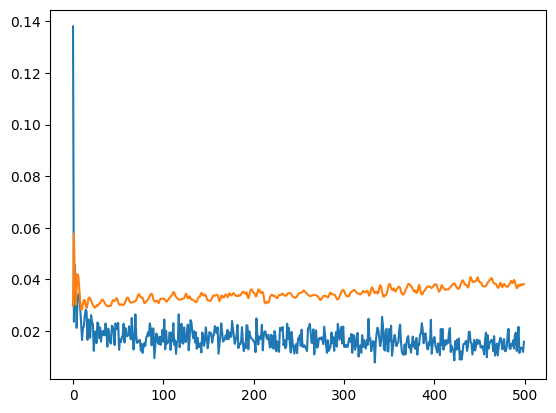

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# Experimentation

In [23]:
model = Sequential()

model.add(Dense(128, input_dim=1, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))

adam = Adam(learning_rate=0.01)
model.compile(loss='mse', optimizer=adam, metrics=['mse'])

history = model.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test), verbose=False)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


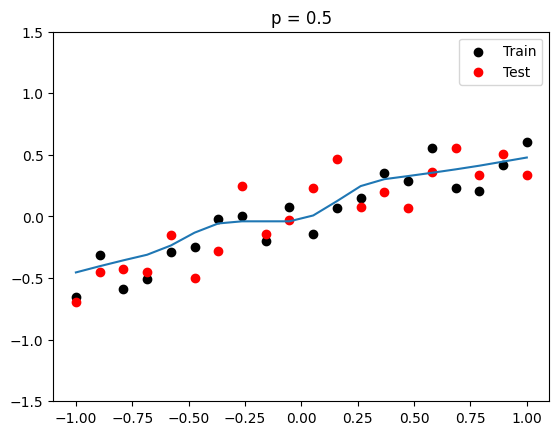

In [27]:
plt.figure()
plt.title('p = 0.5')
plt.scatter(X_train, y_train, c='black', label='Train')
plt.scatter(X_test, y_test, c='red', label='Test')
plt.plot(X_test, y_pred)
plt.legend()
plt.ylim(-1.5, 1.5)
plt.show()

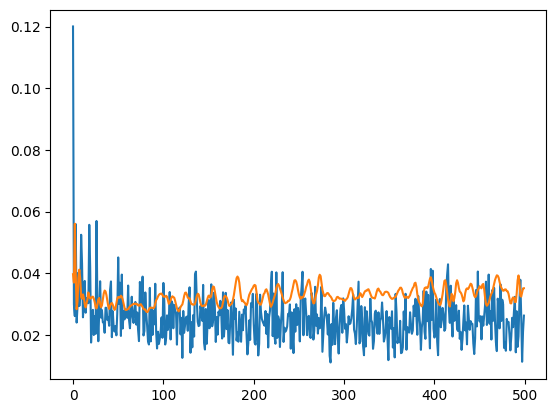

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])